We want to directly visualize the relationship we got between biomass, productivity, and diversity. These plots won't necessarily accurately represent the real world, in that we will hold some parameters fixed while changing others, but it should give an idea of what this looks like.

In [1]:
import numpy as np
import pandas as pd
import biomass as bm
import scipy.interpolate as interp

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm, colors
%matplotlib inline

In [2]:
# Set up ranges and parameters for all plots
# Mean values from data are S = 99 E = 1.6e6, N = 1.2e4
# Medians are S = 58.0 E = 1.4e4, N = 700
# Mins are S = 10, E = 1900, N = 136
# Maxs are S = 673, E = 2.4e7, N = 2.4e5

# Set a value to hold N at
nfix = 1000
# And if we want to hold S fixed
sfix = 50
# And for E
efix = 1e5

# Set size of range for n, s, e, when we range over them.
ns = 40
ne = 40
nn = 40

# Now set a range for s. Note that I made it smaller, since min N/S ~ 4
srange = np.linspace(10,250,num=ns)
# Now set a range for E. Range for E/N goes from ~4 to ~3000
erange = np.logspace(np.log10(5000),np.log10(1e7),num=ne)
# Finally set a range for N
nrange = np.logspace(np.log10(250),np.log10(2000),num=nn)

# Now make appropriate mesh grids
S, Es = np.meshgrid(srange,erange)
N, En = np.meshgrid(nrange,erange)
Sn, Ns = np.meshgrid(srange,nrange)

# 2D Plots

## Biomass contours

In [5]:
biomass = np.zeros([ne,ns])
for i,s in enumerate(srange):
    for j,e in enumerate(erange):
        biomass[j,i] = bm.biomass({'N':nfix,'E':e,'S':s})

Text(0.5, 0, 'S')

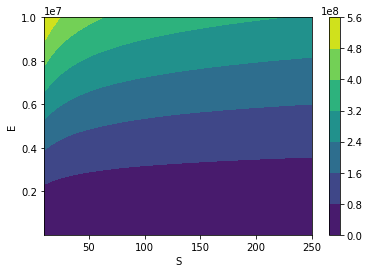

In [6]:
# Linear
plt.contourf(S,Es,biomass)
plt.colorbar()
plt.ylabel('E')
plt.xlabel('S')

Text(0.5, 0, 'S')

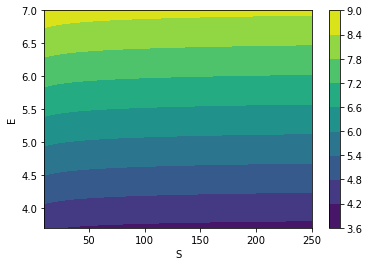

In [7]:
# With log e and b
plt.contourf(srange,np.log10(erange),np.log10(biomass))
plt.colorbar()
plt.ylabel('E')
plt.xlabel('S')

In [132]:
biomass_ne = np.zeros([ne,nn])
for i,n in enumerate(nrange):
    for j,e in enumerate(erange):
        biomass_ne[j,i] = bm.biomass({'N':n,'E':e,'S':sfix})

Text(0.5, 0, 'N')

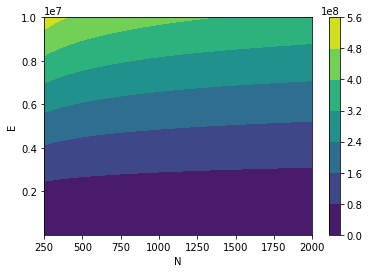

In [9]:
# Linear
plt.contourf(N,En,biomass_ne)
plt.colorbar()
plt.ylabel('E')
plt.xlabel('N')

In [297]:
# With N and S
biomass_ns = np.zeros([nn,ns])
for i,s in enumerate(srange):
    for j,n in enumerate(nrange):
        biomass_ns[j,i] = bm.biomass({'N':n,'E':efix,'S':s})

/Users/micbru/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Text(0.5, 0, 'S')

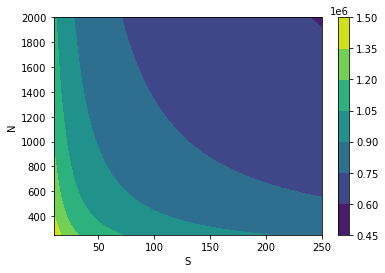

In [298]:
plt.contourf(Sn,Ns,biomass_ns)
plt.colorbar()
plt.ylabel('N')
plt.xlabel('S')

## Contour lines with biomass on y

Text(0.5, 0, 'S')

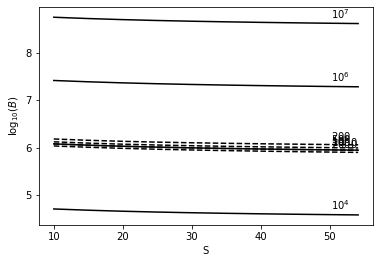

In [105]:
# What about a few different E values
# So that isn't a very interesting plot, since essentially N and E just split the biomass diversity relationship.
evals = np.array([1e4,1e5,1e6,1e7])
nvals = np.array([200,500,1000,2000])

fig,ax = plt.subplots()
# Plot for varying e
for i,e in enumerate(evals):
    ax.plot(srange[0:10],[np.log10(bm.biomass({'N':nfix,'E':e,'S':s})) for s in srange[0:10]],c='k')
    ax.text(srange[9]-4,np.log10(bm.biomass({'N':nfix,'E':e,'S':srange[9]}))+0.1,r'$10^{}$'.format(i+4))
# Now for varying n
for i,n in enumerate(nvals):
    ax.plot(srange[0:10],[np.log10(bm.biomass({'N':n,'E':efix,'S':s})) for s in srange[0:10]],c='k',ls='--')
    ax.text(srange[9]-4,np.log10(bm.biomass({'N':n,'E':efix,'S':srange[9]}))+0.1,r'${}$'.format(n))

ax.set_ylabel(r'$\log_{10}(B)$')
ax.set_xlabel('S')

Text(0.5, 0, 'S')

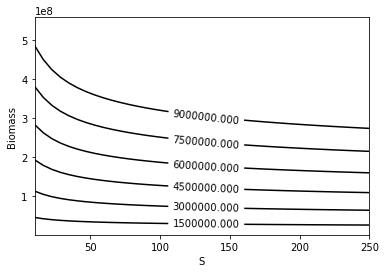

In [10]:
# What about a contour plot where the contours are E and the y-axis is biomass?
# Now Z from the original plot is Y, and X is still X (srange)
fig, ax = plt.subplots()
EC = ax.contour(S,biomass,Es,colors='k')
ax.clabel(EC)
ax.set_ylabel('Biomass')
ax.set_xlabel('S')

Text(0.5, 0, 'N/S')

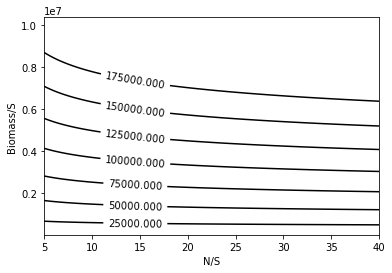

In [299]:
# Now try the same thing but with N/S, E/S, and B/S
fig, ax = plt.subplots()
NC = ax.contour(N/sfix,biomass_ne/sfix,En/sfix,colors='k')
ax.clabel(NC)
ax.set_ylabel('Biomass/S')
ax.set_xlabel('N/S')

In [300]:
# Do these really collapse for different S values?
biomass_ne2 = np.zeros([ne,nn])
for i,n in enumerate(nrange):
    for j,e in enumerate(erange):
        biomass_ne2[j,i] = bm.biomass({'N':n,'E':e,'S':sfix*2})

In [317]:
biomass_ne12 = np.zeros([ne,nn])
for i,n in enumerate(nrange):
    for j,e in enumerate(erange):
        biomass_ne12[j,i] = bm.biomass({'N':n,'E':e,'S':sfix/2})

Text(0.5, 0, 'N/S')

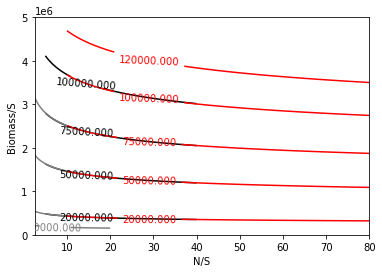

In [322]:
# Now try the same thing but with N/S, E/S, and B/S
fig, ax = plt.subplots()

NC1 = ax.contour(N/sfix,biomass_ne/sfix,En/sfix,levels=[20000,50000,75000,100000],colors='k')
ax.clabel(NC1)

NC2 = ax.contour(N/sfix/2,biomass_ne2/sfix/2,En/sfix/2,levels=[10000,20000,50000,75000],colors='gray')
ax.clabel(NC2,levels=[10000])

NC3 = ax.contour(N/sfix*2,biomass_ne12/sfix*2,En/sfix*2,levels=[20000,50000,75000,100000,120000],colors='red')
ax.clabel(NC3)

ax.set_ylim(0,5e6)
ax.set_ylabel('Biomass/S')
ax.set_xlabel('N/S')

# 3D plots

In [ ]:
'''
Maybe not possible to do this and make it easy to visualize but it would be cool to have a 3-D graph look like 
with E vs N vs B and with contours of S?  Oriented in such a way that the surfaces show.

Or since only ratios enter (ignoring upper limits on sums) maybe a 2-D with N/S vs  B/S and contours of E/S???  
Do-able but maybe hard for readers to relate the information in the graph to their traditional questions such as 
how does E depend on S.
'''

In [3]:
biomass_ne_s100 = np.zeros([ne,nn])
for i,n in enumerate(nrange):
    for j,e in enumerate(erange):
        biomass_ne_s100[j,i] = bm.biomass({'N':n,'E':e,'S':100})

NameError: name 'biomass_ne' is not defined

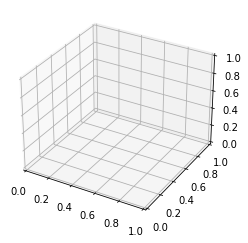

In [4]:
# plot
fig = plt.figure()
ax = fig.gca(projection='3d')
sur = ax.plot_surface(N,En,biomass_ne,cmap='winter',alpha=0.7)
sur2 = ax.plot_surface(N,En,biomass_ne_s100,cmap='autumn',alpha=0.7)
ax.set_xlabel('N')
ax.set_ylabel('E')
ax.set_zlabel('B')
cb = fig.colorbar(sur, shrink=0.5, aspect=8,pad=0.0)
cb.set_label('S = 50')
cb2 = fig.colorbar(sur2,shrink=0.5, aspect=8,pad=0.15)
cb2.set_label('S = 100')
ax.view_init(10, 10)

plt.show()

Text(0.5, 0, 'E')

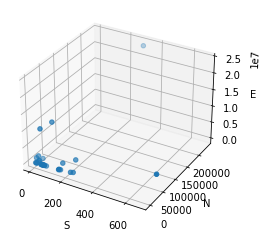

In [5]:
# What if I interpolate the empirical S,N,E surface, then use the color on that surface to indicate B?
data = pd.read_csv('data_biomass.csv')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data['S'],data['N'],data['E'])
ax.set_xlabel('S')
ax.set_ylabel('N')
ax.set_zlabel('E')

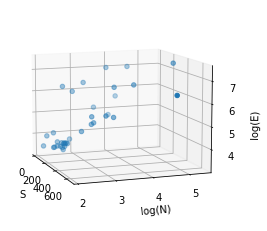

In [21]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data['S'],np.log10(data['N']),np.log10(data['E']))
ax.set_xlabel('S')
ax.set_ylabel('log(N)')
ax.set_zlabel('log(E)')
ax.view_init(10,340)

AttributeError: 'PathCollection' object has no property 'size'

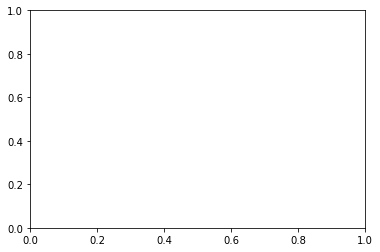

In [15]:
# as 2d

fig,ax = plt.subplots()
ax.scatter(data['S'],np.log10(data['N']),size=np.log10(data['E']))
ax.set_xlabel('S')
ax.set_ylabel('log(N)')

Text(0, 0.5, 'N')

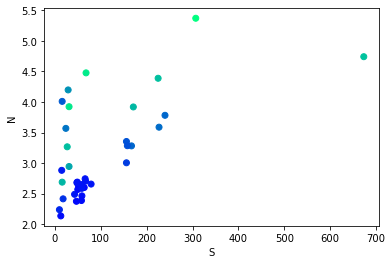

In [13]:
# as 2d

fig,ax = plt.subplots()
ax.scatter(data['S'],np.log10(data['N']),c=np.log10(data['E']),cmap='winter')
ax.set_xlabel('S')
ax.set_ylabel('log(N)')

Text(0, 0.5, 'N')

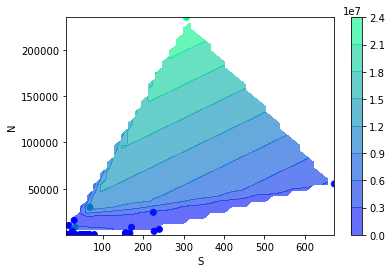

In [8]:
# Now interpolate
points = (data['S'],data['N'])
values = data['E']
xi = np.linspace(np.min(data['S']),np.max(data['S']),ns)
yi = np.linspace(np.min(data['N']),np.max(data['N']),nn)
grid_x, grid_y = np.meshgrid(xi,yi)#np.mgrid[np.min(data['S']):np.max(data['S']):40j, 
                 #         np.min(data['N']):np.max(data['N']):40j]
zi = interp.griddata(points,values,(grid_x,grid_y),method='linear')

fig,ax = plt.subplots()
cbar = ax.contourf(grid_x,grid_y,zi,cmap='winter',alpha=0.6)
fig.colorbar(cbar)
ax.scatter(points[0],points[1],c=values,cmap='winter')
ax.set_xlabel('S')
ax.set_ylabel('N')

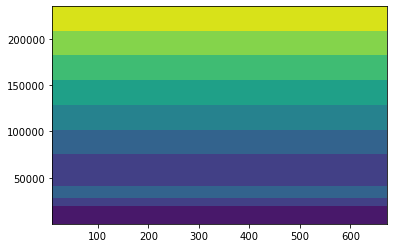

In [233]:
# Or with rbf. This looks bad.
rbf3 = interp.Rbf(data['S'], data['N'], data['E'], function="multiquadric", smooth=5)
znew = rbf3(grid_x, grid_y)


fig,ax = plt.subplots()
ax.contourf(grid_x, grid_y, znew)

In [248]:
# Use zi as the new surface with grid_x and grid_y
biomass_surface = np.zeros([ns,nn])
for i,s in enumerate(xi):
    for j,n in enumerate(yi):
        if ~np.isnan(zi[j,i]):
            biomass_surface[j,i] = bm.biomass({'N':n,'E':zi[j,i],'S':s})

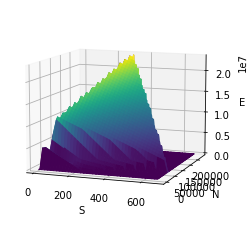

In [295]:
# set zi to remove nan
zi[np.isnan(zi)]=0

# Set up color surface
minn, maxx = biomass_surface.min(), biomass_surface.max()
norm = matplotlib.colors.Normalize(minn, maxx)
m = plt.cm.ScalarMappable(norm=norm, cmap='viridis')
m.set_array([])
fcolors = m.to_rgba(biomass_surface)

# plot
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(grid_x, grid_y, zi, rstride=1, cstride=1, facecolors=fcolors, vmin=minn, vmax=maxx, shade=False)
#bm_norm = biomass_surface/biomass_surface.max()  # normalize 0..1
#surf = ax.plot_surface(
#    grid_x, grid_y, zi, rstride=1, cstride=1,
#    facecolors=cm.winter(bm_norm),
#    linewidth=0, antialiased=False, shade=False)

ax.set_xlabel('S')
ax.set_ylabel('N')
ax.set_zlabel('E')

ax.view_init(10, -70)

#?fig.colorbar(surf,shrink=0.5,aspect=8,pad=0.15,vmin=minn,vmax=maxx)

## Examples

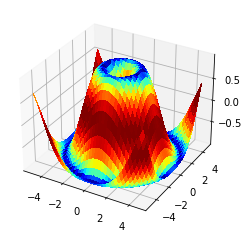

In [79]:
# Example
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, .25)
Y = np.arange(-5, 5, .25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
Gx, Gy = np.gradient(Z) # gradients with respect to x and y
G = (Gx**2+Gy**2)**.5  # gradient magnitude
nn = G/G.max()  # normalize 0..1
surf = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1,
    facecolors=cm.jet(nn),
    linewidth=0, antialiased=False, shade=False)
plt.show()

Text(0.5, 0, 'z')

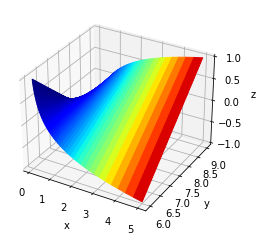

In [69]:
# domains
x = np.logspace(-1.,np.log10(5),50) # [0.1, 5]
y = np.linspace(6,9,50)             # [6, 9]
z = np.linspace(-1,1,50)            # [-1, 1]

# convert to 2d matrices
Z = np.outer(z.T, z)        # 50x50
X, Y = np.meshgrid(x, y)    # 50x50

# fourth dimention - colormap
# create colormap according to x-value (can use any 50x50 array)
color_dimension = X # change to desired fourth dimension
minn, maxx = color_dimension.min(), color_dimension.max()
norm = matplotlib.colors.Normalize(minn, maxx)
m = plt.cm.ScalarMappable(norm=norm, cmap='jet')
m.set_array([])
fcolors = m.to_rgba(color_dimension)

# plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z, rstride=1, cstride=1, facecolors=fcolors, vmin=minn, vmax=maxx, shade=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')